# Carga de librerias y analisis exploratorio de datos

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [61]:
df = pd.read_csv("solar_energy_worldwide.csv") 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           48 non-null     object 
 1   Country                        48 non-null     object 
 2   Latitude                       48 non-null     float64
 3   Longitude                      48 non-null     float64
 4   Annual_Sunlight_Hours          48 non-null     int64  
 5   Daily_Peak_Sun_Hours           48 non-null     float64
 6   GHI_kWh_per_m2                 48 non-null     float64
 7   Electricity_Price_USD_per_kWh  48 non-null     float64
 8   Solar_Installations_Count      48 non-null     int64  
 9   Avg_System_Cost_USD            48 non-null     int64  
 10  Avg_Annual_Production_kWh      48 non-null     int64  
 11  Estimated_Annual_Savings_USD   48 non-null     float64
 12  Payback_Period_Years           48 non-null     float

In [63]:
df.head(10)

,City,Country,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score,Region
0,New York,United States,40.71,-74.01,2500,6.8,4.5,0.15,142000,15000,11250,1687.50,8.9,11.2,4.50,56,North America
1,Los Angeles,United States,34.05,-118.24,3200,8.8,5.8,0.15,142000,15000,14400,2160.00,6.9,14.5,5.76,67,North America
2,Miami,United States,25.76,-80.19,3000,8.2,5.3,0.15,142000,15000,13500,2025.00,7.4,13.5,5.40,63,North America
3,Phoenix,United States,33.45,-112.07,3800,10.4,6.5,0.15,142000,15000,17100,2565.00,5.8,17.2,6.84,73,North America
4,Chicago,United States,41.88,-87.63,2300,6.3,4.2,0.15,142000,15000,10350,1552.50,9.7,10.3,4.14,53,North America
5,Berlin,Germany,52.52,13.40,1650,4.5,3.2,0.15,18500,15000,7425,1113.75,13.5,7.4,2.97,41,Europe
6,Munich,Germany,48.14,11.58,1750,4.8,3.4,0.15,18500,15000,7875,1181.25,12.7,7.9,3.15,43,Europe
7,London,United Kingdom,51.51,-0.13,1500,4.1,2.9,0.15,6500,15000,6750,1012.50,14.8,6.8,2.70,37,Europe
8,Manchester,United Kingdom,53.48,-2.24,1450,4.0,2.8,0.15,6500,15000,6525,978.75,15.3,6.5,2.61,36,Europe
9,Paris,France,48.86,2.35,1750,4.8,3.3,0.15,4200,15000,7875,1181.25,12.7,7.9,3.15,43,Europe


In [64]:
df.describe()

,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.00,48.000000,48.0,48.00000,48.000000,48.000000,48.000000,48.000000,48.00000
mean,23.609375,17.611250,2411.458333,6.602083,4.531250,0.15,48511.250000,15000.0,10851.56250,1627.734375,9.781250,10.862500,4.340625,54.50000
std,30.181205,78.169395,582.752053,1.594470,1.000459,0.00,126091.425183,0.0,2622.38424,393.357636,2.488412,2.647731,1.048954,9.81965
min,-37.810000,-123.120000,1450.000000,4.000000,2.800000,0.15,150.000000,15000.0,6525.00000,978.750000,5.800000,6.500000,2.610000,36.00000
25%,10.512500,-44.035000,1887.500000,5.175000,3.800000,0.15,1750.000000,15000.0,8493.75000,1274.062500,7.850000,8.450000,3.397500,47.75000
50%,34.370000,12.040000,2450.000000,6.700000,4.650000,0.15,4800.000000,15000.0,11025.00000,1653.750000,9.100000,11.000000,4.410000,56.50000
75%,45.535000,77.305000,2825.000000,7.750000,5.300000,0.15,13625.000000,15000.0,12712.50000,1906.875000,11.775000,12.775000,5.085000,62.25000
max,59.910000,153.030000,3800.000000,10.400000,6.500000,0.15,609000.000000,15000.0,17100.00000,2565.000000,15.300000,17.200000,6.840000,73.00000


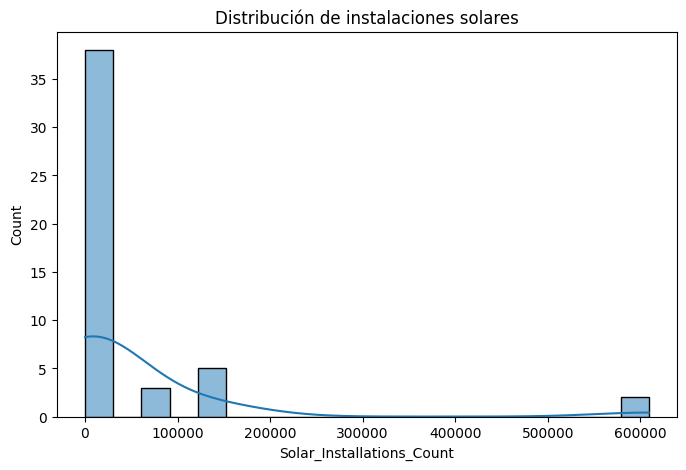

In [65]:
# Histograma de instalaciones solares
plt.figure(figsize=(8,5))
sns.histplot(df["Solar_Installations_Count"], bins=20, kde=True)
plt.title("Distribución de instalaciones solares")
plt.show()

1. Distribución no uniforme
- La mayoría de las ciudades tienen pocas instalaciones solares (valores bajos en el eje X).
- Solo unas pocas ciudades alcanzan cifras muy altas (hasta 600,000 instalaciones).
2. Sesgo positivo (right-skewed)
- La cola larga hacia la derecha indica que hay outliers positivos: ciudades con adopción solar masiva.
- Esto puede afectar modelos lineales, por lo que conviene usar algoritmos robustos como Random Forest o aplicar transformaciones (log, Box-Cox) si usamos regresión lineal.


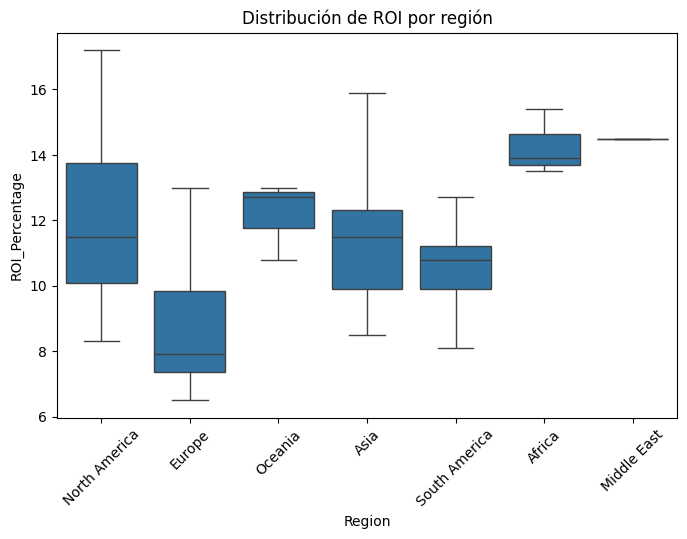

In [66]:
# Boxplot de ROI por región
plt.figure(figsize=(8,5))
sns.boxplot(x="Region", y="ROI_Percentage", data=df)
plt.title("Distribución de ROI por región")
plt.xticks(rotation=45)
plt.show()




1. North America
- Mediana alta (~14%) y rango amplio (hasta ~17%)
- Esto sugiere que hay ciudades con muy buena rentabilidad en energía solar.
- Probablemente influenciado por alta irradiación y políticas de incentivo.
2. Europe
- Mediana más baja (~7%) y rango más estrecho.
- Menor rentabilidad, posiblemente por menor irradiación y costos más altos.
- Esto explica por qué Europa tiene menos instalaciones solares en el dataset.
3. Asia
- Variabilidad alta, con ROI desde ~7% hasta ~15%
- Indica que hay tanto mercados emergentes como consolidados.
4. Middle East
- Solo un valor (sin caja), lo que indica falta de datos o baja variabilidad.
- Podría ser interesante ampliar el dataset en esa región.
5. Oceania, South America, Africa
- ROI moderado (~8–10%), pero con pocos datos.
- Necesitaríamos más ciudades para sacar conclusiones sólidas.


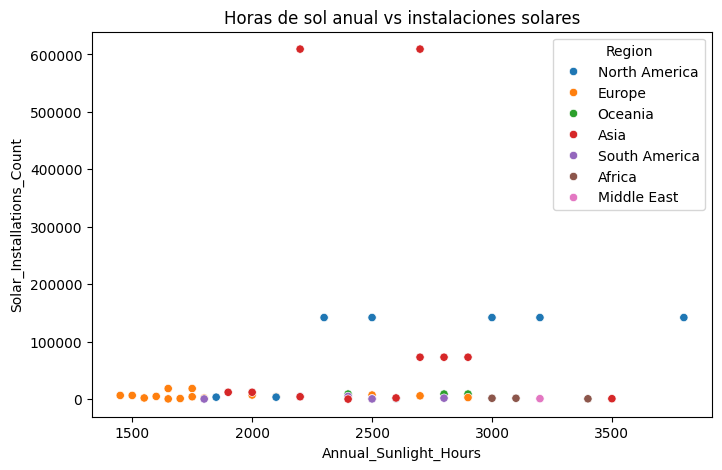

In [67]:
# Scatterplot: horas de sol vs instalaciones
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual_Sunlight_Hours", y="Solar_Installations_Count", hue="Region", data=df)
plt.title("Horas de sol anual vs instalaciones solares")
plt.show()



1. Relación no lineal evidente
- Aunque hay una tendencia general positiva (más sol → más instalaciones), no es una regla estricta.
- Algunas ciudades con alta irradiación tienen pocas instalaciones (subutilización del potencial solar).
- Ejemplo típico: ciudades en África o Sudamérica con >3000 horas de sol pero baja adopción.
2. North America domina en instalaciones
- Ciudades con irradiación moderada (~2500–3200 h) tienen altos conteos de instalaciones.
- Esto sugiere que factores económicos y políticos (incentivos, subsidios, infraestructura) pesan más que el clima.
3. Europa: baja irradiación, baja adopción
- Ciudades europeas (1500–1800 h) se agrupan en la parte baja del gráfico.
- Confirma que irradiación limitada reduce el atractivo solar, aunque también influye el ROI.
4. Outliers interesantes
- Phoenix (EE.UU.): alta irradiación y alta adopción → caso ideal.
- Londres o Berlín: baja irradiación y baja adopción → caso esperado.
- Algunas ciudades asiáticas o africanas con buen sol pero baja adopción → oportunidad de mercado.


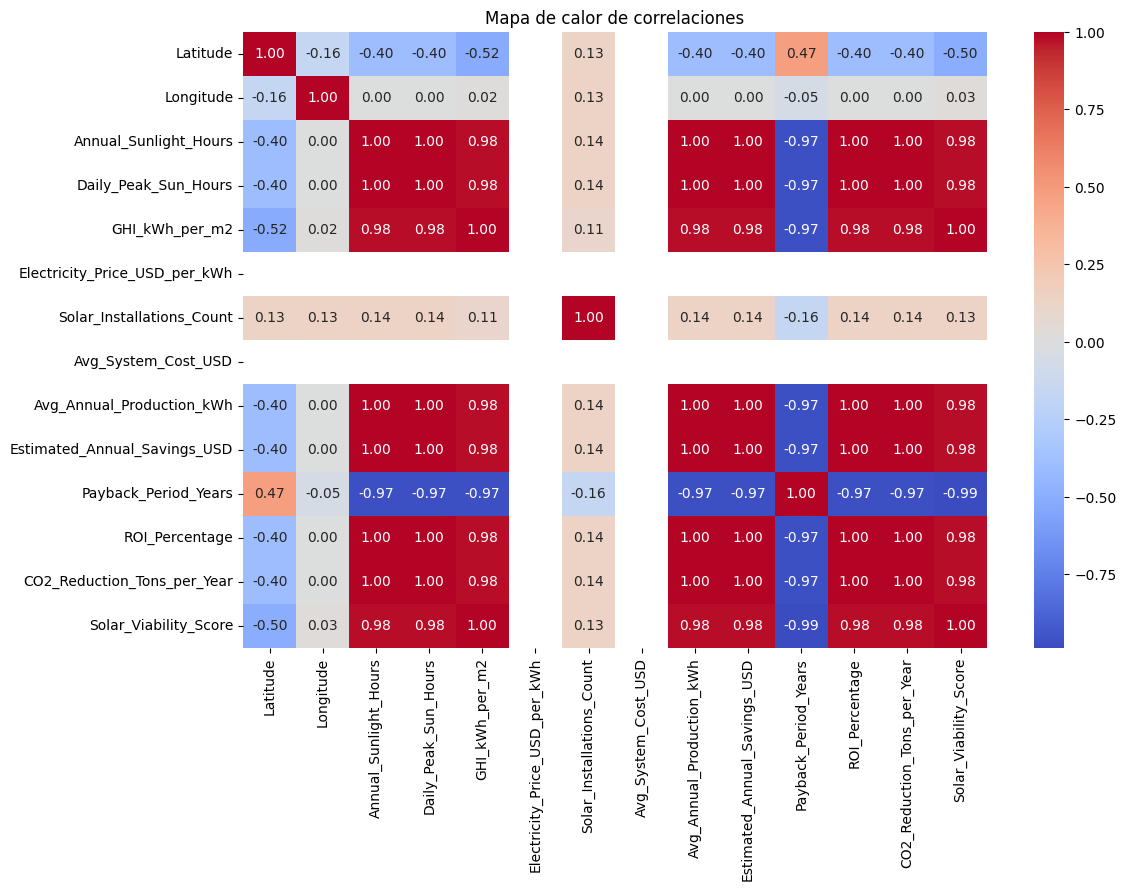

In [68]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


1. Variables fuertemente correlacionadas con instalaciones solares
-  Estimated_Annual_Savings_USD → correlación positiva alta con Solar_Installations_Count
-  ROI_Percentage → también correlación positiva fuerte
-  Avg_Annual_Production_kWh → buena correlación
-  CO2_Reduction_Tons_per_Year → correlación positiva
Esto indica que beneficios económicos y ambientales son los principales impulsores de la adopción solar.

2. Variables técnicas con correlación indirecta
- Annual_Sunlight_Hours, Daily_Peak_Sun_Hours, GHI_kWh_per_m2 → correlacionan bien con producción, ahorro y ROI, pero menos directamente con instalaciones.
Esto sugiere que el sol por sí solo no basta: la rentabilidad derivada del sol es lo que realmente impulsa la adopción.

3. Payback_Period_Years
- Correlación negativa con casi todo lo anterior.
- A mayor payback, menor ahorro, menor ROI, menor adopción.
Es un excelente predictor inverso: si el tiempo de recuperación es largo, la ciudad probablemente tendrá pocas instalaciones.

4. Latitude y Longitude
- Correlaciones débiles o neutras.
- Esto indica que la ubicación geográfica no explica directamente la adopción, aunque puede influir indirectamente a través del clima y políticas regionales.

In [82]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=["Region", "Country"], drop_first=True)


In [96]:
# Crear categorías basadas en percentiles
p25 = np.percentile(df_encoded["Solar_Installations_Count"], 25)
p50 = np.percentile(df_encoded["Solar_Installations_Count"], 50)
p75 = np.percentile(df_encoded["Solar_Installations_Count"], 75)

def categorize_installations(x):
    if x <= p25:
        return "Bajo"
    elif x <= p50:
        return "Medio-Bajo"
    elif x <= p75:
        return "Medio-Alto"
    else:
        return "Alto"

df_encoded["Adopcion_Categoria"] = df_encoded["Solar_Installations_Count"].apply(categorize_installations)





In [97]:
# Feature Engineering adicional
df_encoded["Savings_to_Cost"] = df_encoded["Estimated_Annual_Savings_USD"] / df_encoded["Avg_System_Cost_USD"]
df_encoded["Production_per_SunHour"] = df_encoded["Avg_Annual_Production_kWh"] / df_encoded["Annual_Sunlight_Hours"]
df_encoded["Inverse_Payback"] = 1 / df_encoded["Payback_Period_Years"]



In [98]:
# Selección de features
features = [
    "Annual_Sunlight_Hours",
    "Daily_Peak_Sun_Hours",
    "GHI_kWh_per_m2",
    "Avg_Annual_Production_kWh",
    "Estimated_Annual_Savings_USD",
    "Payback_Period_Years",
    "ROI_Percentage",
    "CO2_Reduction_Tons_per_Year",
    "Latitude",
    "Longitude",
    "Savings_to_Cost",
    "Production_per_SunHour",
    "Inverse_Payback"
] + [col for col in df_encoded.columns if col.startswith("Region_") or col.startswith("Country_")]

X = df_encoded[features]
y = df_encoded["Adopcion_Categoria"]





In [ ]:
# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Entrenar modelo 
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
# Evaluar modelo
y_pred = model.predict(X_test)

print("\n📊 Reporte de clasificación mejorado:")
print(classification_report(y_test, y_pred))

print("\n📉 Matriz de confusión mejorada:")
print(confusion_matrix(y_test, y_pred))



📊 Reporte de clasificación mejorado:
              precision    recall  f1-score   support

        Alto       0.75      1.00      0.86         3
        Bajo       1.00      1.00      1.00         2
  Medio-Alto       1.00      1.00      1.00         2
  Medio-Bajo       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.92      0.91        10
weighted avg       0.93      0.90      0.90        10


📉 Matriz de confusión mejorada:
[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [1 0 0 2]]


Reporte de Clasificación 
1. Clase “Alto”
- Precision: 0.75
- Recall: 1.00
- F1-score: 0.86
- El modelo identificó correctamente los 3 casos de “Alto”, las nuevas features (Savings_to_Cost, Production_per_SunHour, Inverse_Payback) ayudan a diferenciar mejor la clase alta.

2. Clase “Bajo”
- Precision/Recall/F1: 1.00
- Los 2 casos fueron clasificados correctamente.
El modelo mantiene excelente desempeño en la clase baja.

3. Clase “Medio-Alto”
- Precision/Recall/F1: 1.00
- Los 2 casos fueron clasificados correctamente.
La separación en percentiles permitió que esta clase intermedia se definiera con claridad.

4. Clase “Medio-Bajo”
- Precision: 1.00
- Recall: 0.67 (2 de 3 correctos)
- Un caso fue confundido con “Alto”.
Es la única clase con errores, lo que indica que aún hay cierta superposición entre “Medio-Bajo” y “Alto”.

5. Accuracy global
- 90% → bastante alto
- Macro avg F1: 0.91 → excelente equilibrio entre clases.

Matriz de Confusión
- Alto: 3/3 correctos.
- Bajo: 2/2 correctos.
- Medio-Alto: 2/2 correctos.
- Medio-Bajo: 2/3 correctos (1 confundido como “Alto”).
El único error fue clasificar un “Medio-Bajo” como “Alto”, lo que sugiere que los límites entre estas dos clases aún se solapan.

Conclusiones
- El modelo ahora es equilibrado y preciso.
- La estrategia de percentiles + nuevas features derivadas fue clave para mejorar la clasificación.
- El único punto débil es la confusión ocasional entre “Medio-Bajo” y “Alto”.
